In [ ]:
!nvidia-smi

Fri Oct 25 09:40:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Installing & Importing Libraries




In [ ]:
import locale

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# Install necessary libraries
!pip install roboflow
!pip install ultralytics

# Import necessary libraries
from roboflow import Roboflow
from ultralytics import YOLO
import os
import shutil

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.5/877.5 kB 24.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


#Set Up the Dataset

In [ ]:
def setup_dataset():
    rf = Roboflow(api_key="0qNzzb8dNL2sktOCs4cd")
    project = rf.workspace("btp-bgdaz").project("crack-detection-b-w")
    version = project.version(1)
    dataset = version.download("yolov11")
    return dataset

dataset = setup_dataset()

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Crack-Detection-(B&W)-1 in yolov11:: 100%|██████████| 6583/6583 [00:02<00:00, 3036.41it/s]


# Add Background Images to Training Set


In [ ]:
def add_background_images(train_path, bg_images_path, bg_percentage):
    total_bg_images = 280
    num_images_to_add = int(total_bg_images * bg_percentage)

    background_images = sorted(os.listdir(bg_images_path))[:num_images_to_add]

    for img in background_images:
        shutil.copy(os.path.join(bg_images_path, img), train_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/BG_256/

Mounted at /content/drive
BG_copy_100.jpg  BG_copy_143.jpg  BG_copy_186.jpg  BG_copy_228.jpg  BG_copy_270.jpg  BG_copy_5.jpg
BG_copy_101.jpg  BG_copy_144.jpg  BG_copy_187.jpg  BG_copy_229.jpg  BG_copy_271.jpg  BG_copy_60.jpg
BG_copy_102.jpg  BG_copy_145.jpg  BG_copy_188.jpg  BG_copy_22.jpg   BG_copy_272.jpg  BG_copy_61.jpg
BG_copy_103.jpg  BG_copy_146.jpg  BG_copy_189.jpg  BG_copy_230.jpg  BG_copy_273.jpg  BG_copy_62.jpg
BG_copy_104.jpg  BG_copy_147.jpg  BG_copy_18.jpg   BG_copy_231.jpg  BG_copy_274.jpg  BG_copy_63.jpg
BG_copy_105.jpg  BG_copy_148.jpg  BG_copy_190.jpg  BG_copy_232.jpg  BG_copy_275.jpg  BG_copy_64.jpg
BG_copy_106.jpg  BG_copy_149.jpg  BG_copy_191.jpg  BG_copy_233.jpg  BG_copy_276.jpg  BG_copy_65.jpg
BG_copy_107.jpg  BG_copy_14.jpg   BG_copy_192.jpg  BG_copy_234.jpg  BG_copy_277.jpg  BG_copy_66.jpg
BG_copy_108.jpg  BG_copy_150.jpg  BG_copy_193.jpg  BG_copy_235.jpg  BG_copy_278.jpg  BG_copy_67.jpg
BG_copy_109.jpg  BG_copy_151.jpg  BG_copy_194.jpg  BG_copy_236.jpg  BG_copy

In [ ]:
train_path = "/content/Crack-Detection-(B&W)-1/train"
bg_images_path = "/content/drive/MyDrive/BG_256"

bg_percentage = 0.4

add_background_images(train_path, bg_images_path, bg_percentage)

# Train the YOLO Model

In [ ]:
!yolo task=detect mode=train model=yolo11l.pt data = "/content/Crack-Detection-(B&W)-1/data.yaml" epochs=120 imgsz=256 batch=32 plots=True

Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/Crack-Detection-(B&W)-1/data.yaml, epochs=120, time=None, patience=100, batch=32, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data="/content/Crack-Detection-(B&W)-1/data.yaml" imgsz=256 batch=32

Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Scanning /content/Crack-Detection-(B&W)-1/valid/labels.cache... 487 images, 0 backgrounds, 0 corrupt: 100% 487/487 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:05<00:00,  2.70it/s]
                   all        487        924      0.824      0.829      0.909      0.761
Speed: 0.2ms preprocess, 5.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data="/content/Crack-Detection-(B&W)-1/data.yaml" imgsz=256 batch=64

Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Scanning /content/Crack-Detection-(B&W)-1/valid/labels.cache... 487 images, 0 backgrounds, 0 corrupt: 100% 487/487 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.44it/s]
                   all        487        924      0.824      0.829      0.909      0.761
Speed: 0.2ms preprocess, 5.8ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val6
💡 Learn more at https://docs.ultralytics.com/modes/val


# Without albumentation for last 100 epochs


In [ ]:
!yolo task=detect mode=train model=yolo11l.pt data = "/content/Crack-Detection-(B&W)-1/data.yaml" epochs=120 imgsz=256 batch=64 close_mosaic=100 plots=True

Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/Crack-Detection-(B&W)-1/data.yaml, epochs=120, time=None, patience=100, batch=64, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=100, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data="/content/Crack-Detection-(B&W)-1/data.yaml" imgsz=256 batch=64

Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Scanning /content/Crack-Detection-(B&W)-1/valid/labels.cache... 487 images, 0 backgrounds, 0 corrupt: 100% 487/487 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.50it/s]
                   all        487        924      0.815      0.845      0.909      0.761
Speed: 0.5ms preprocess, 5.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val7
💡 Learn more at https://docs.ultralytics.com/modes/val


# Without albumentation for last 20 epochs

In [ ]:
!yolo task=detect mode=train model=yolo11l.pt data = "/content/Crack-Detection-(B&W)-1/data.yaml" epochs=120 imgsz=256 batch=64 close_mosaic=20 plots=True

Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/Crack-Detection-(B&W)-1/data.yaml, epochs=120, time=None, patience=100, batch=64, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=20, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data="/content/Crack-Detection-(B&W)-1/data.yaml" imgsz=256 batch=64

Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Scanning /content/Crack-Detection-(B&W)-1/valid/labels.cache... 487 images, 0 backgrounds, 0 corrupt: 100% 487/487 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.49it/s]
                   all        487        924      0.829      0.828      0.915      0.764
Speed: 0.4ms preprocess, 5.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val8
💡 Learn more at https://docs.ultralytics.com/modes/val


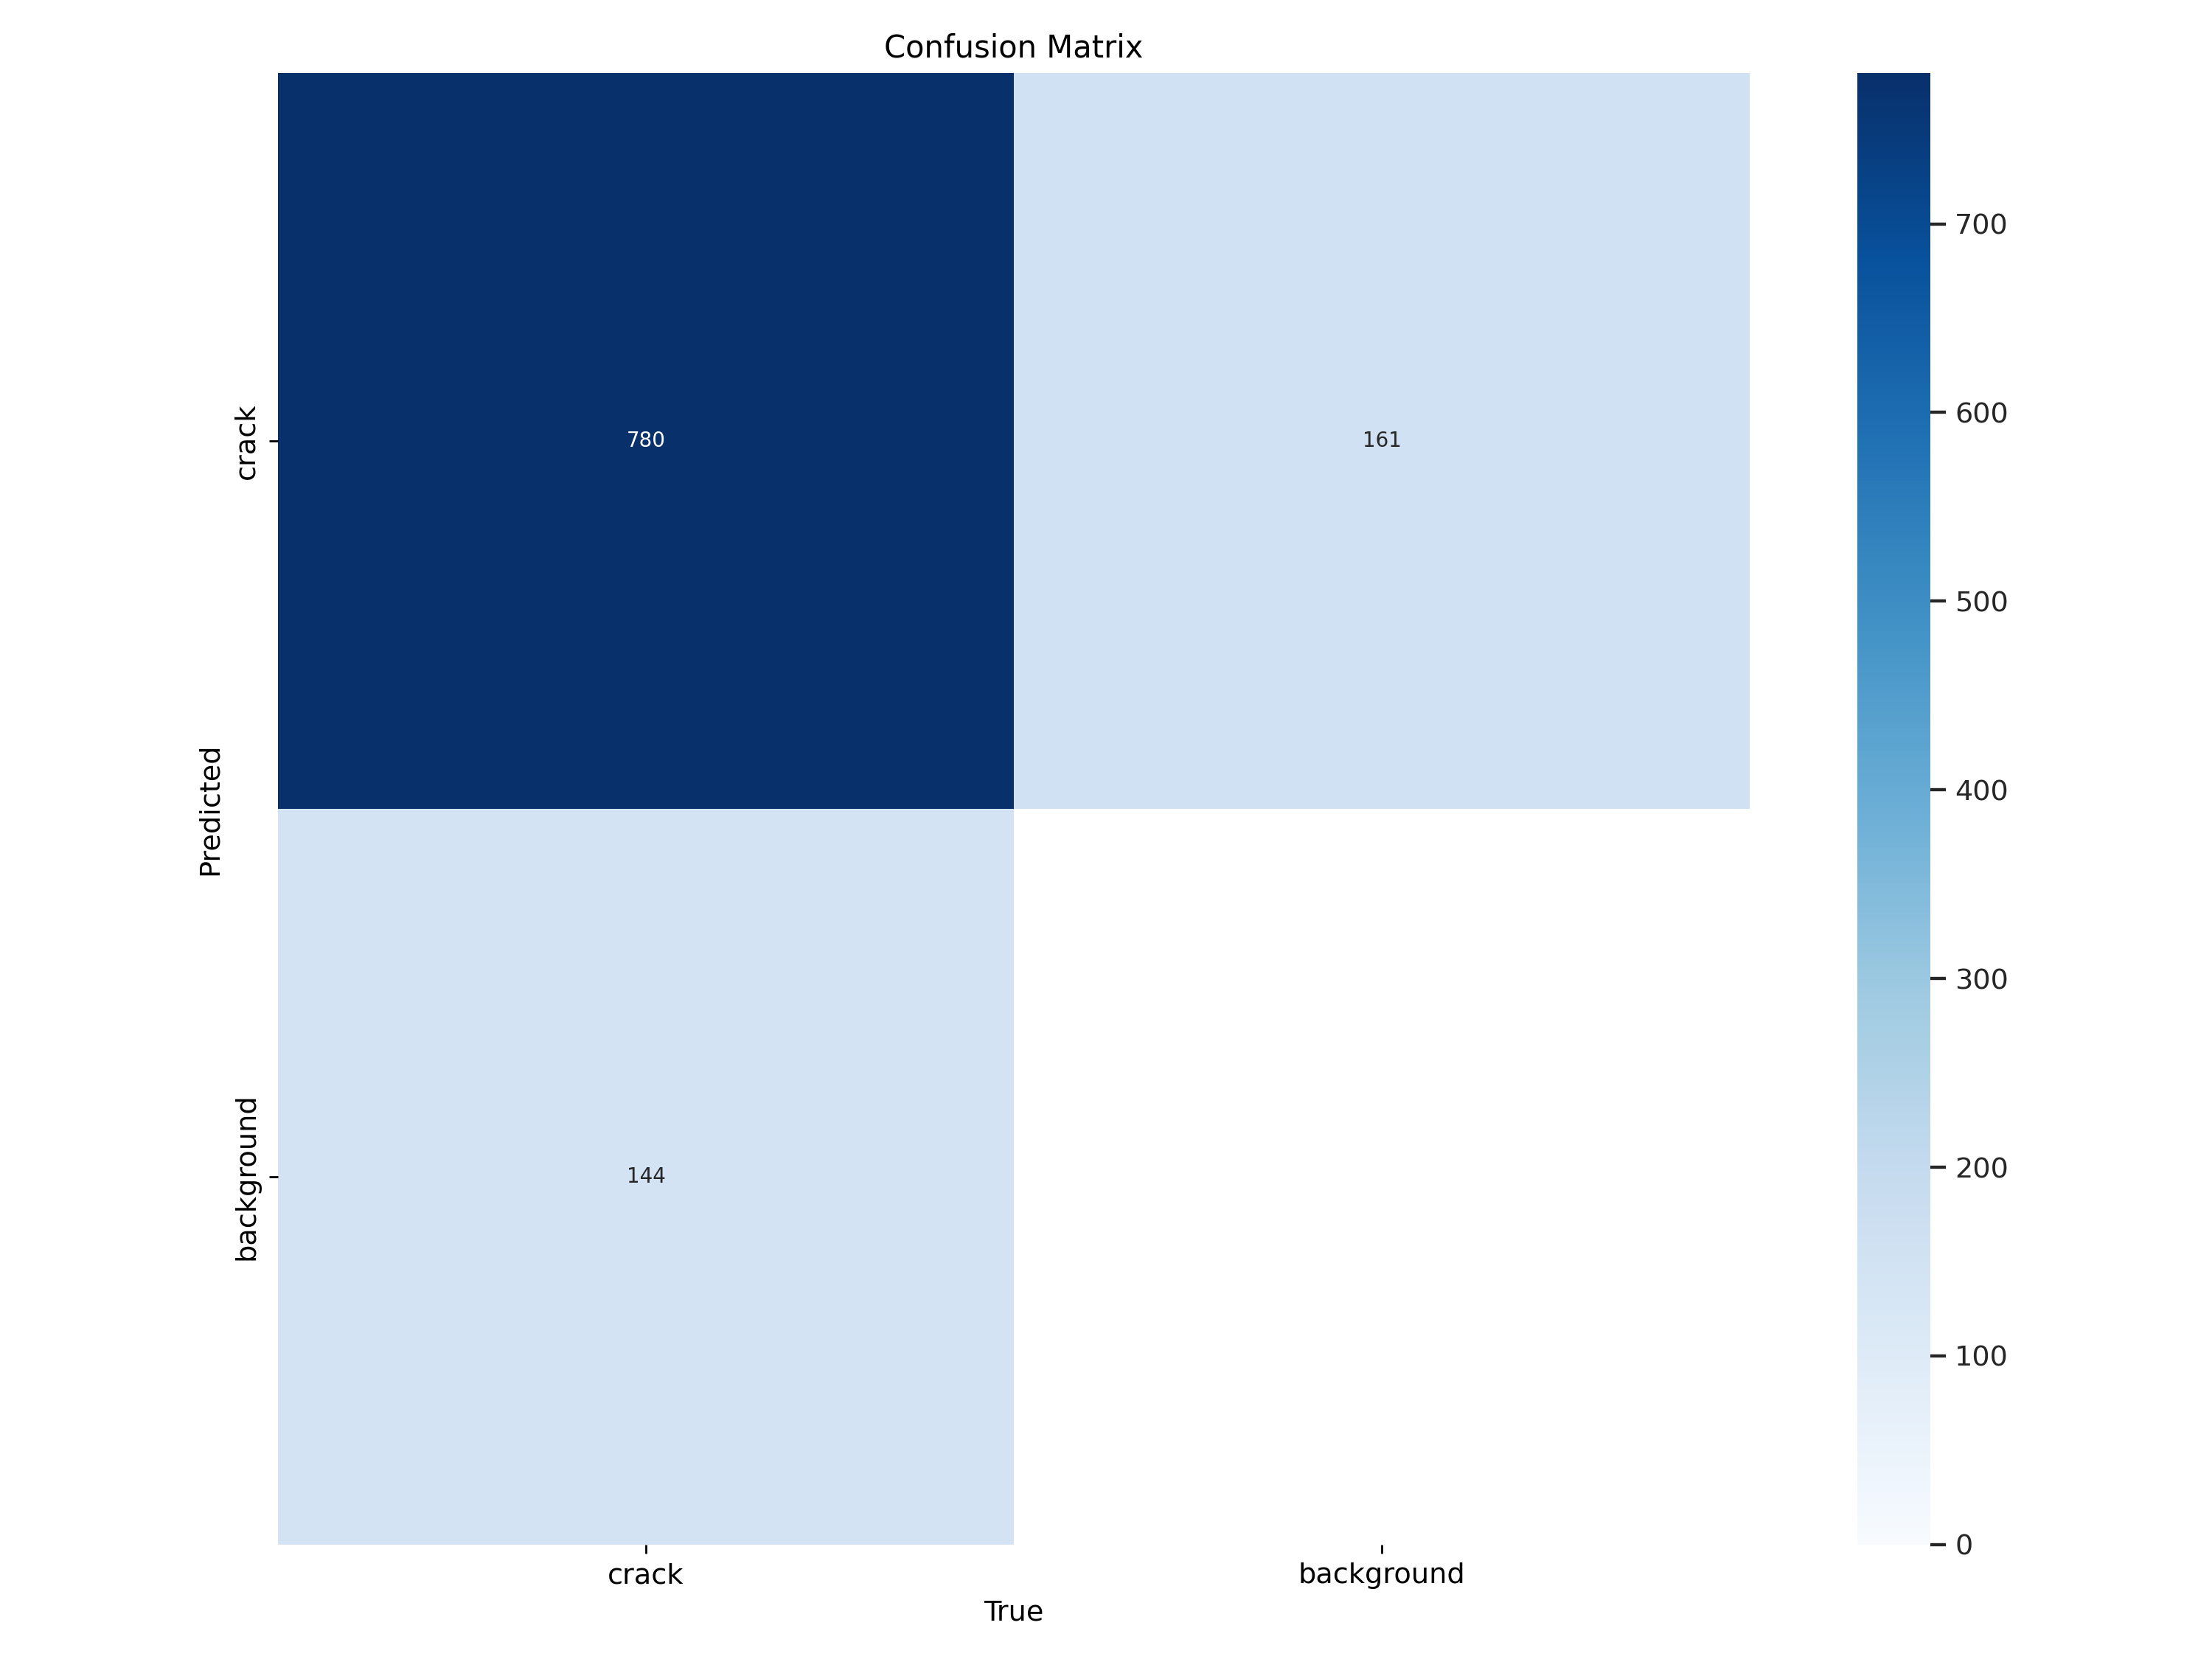

In [ ]:
from IPython.display import Image

Image("/content/runs/detect/train4/confusion_matrix.png", width=600)

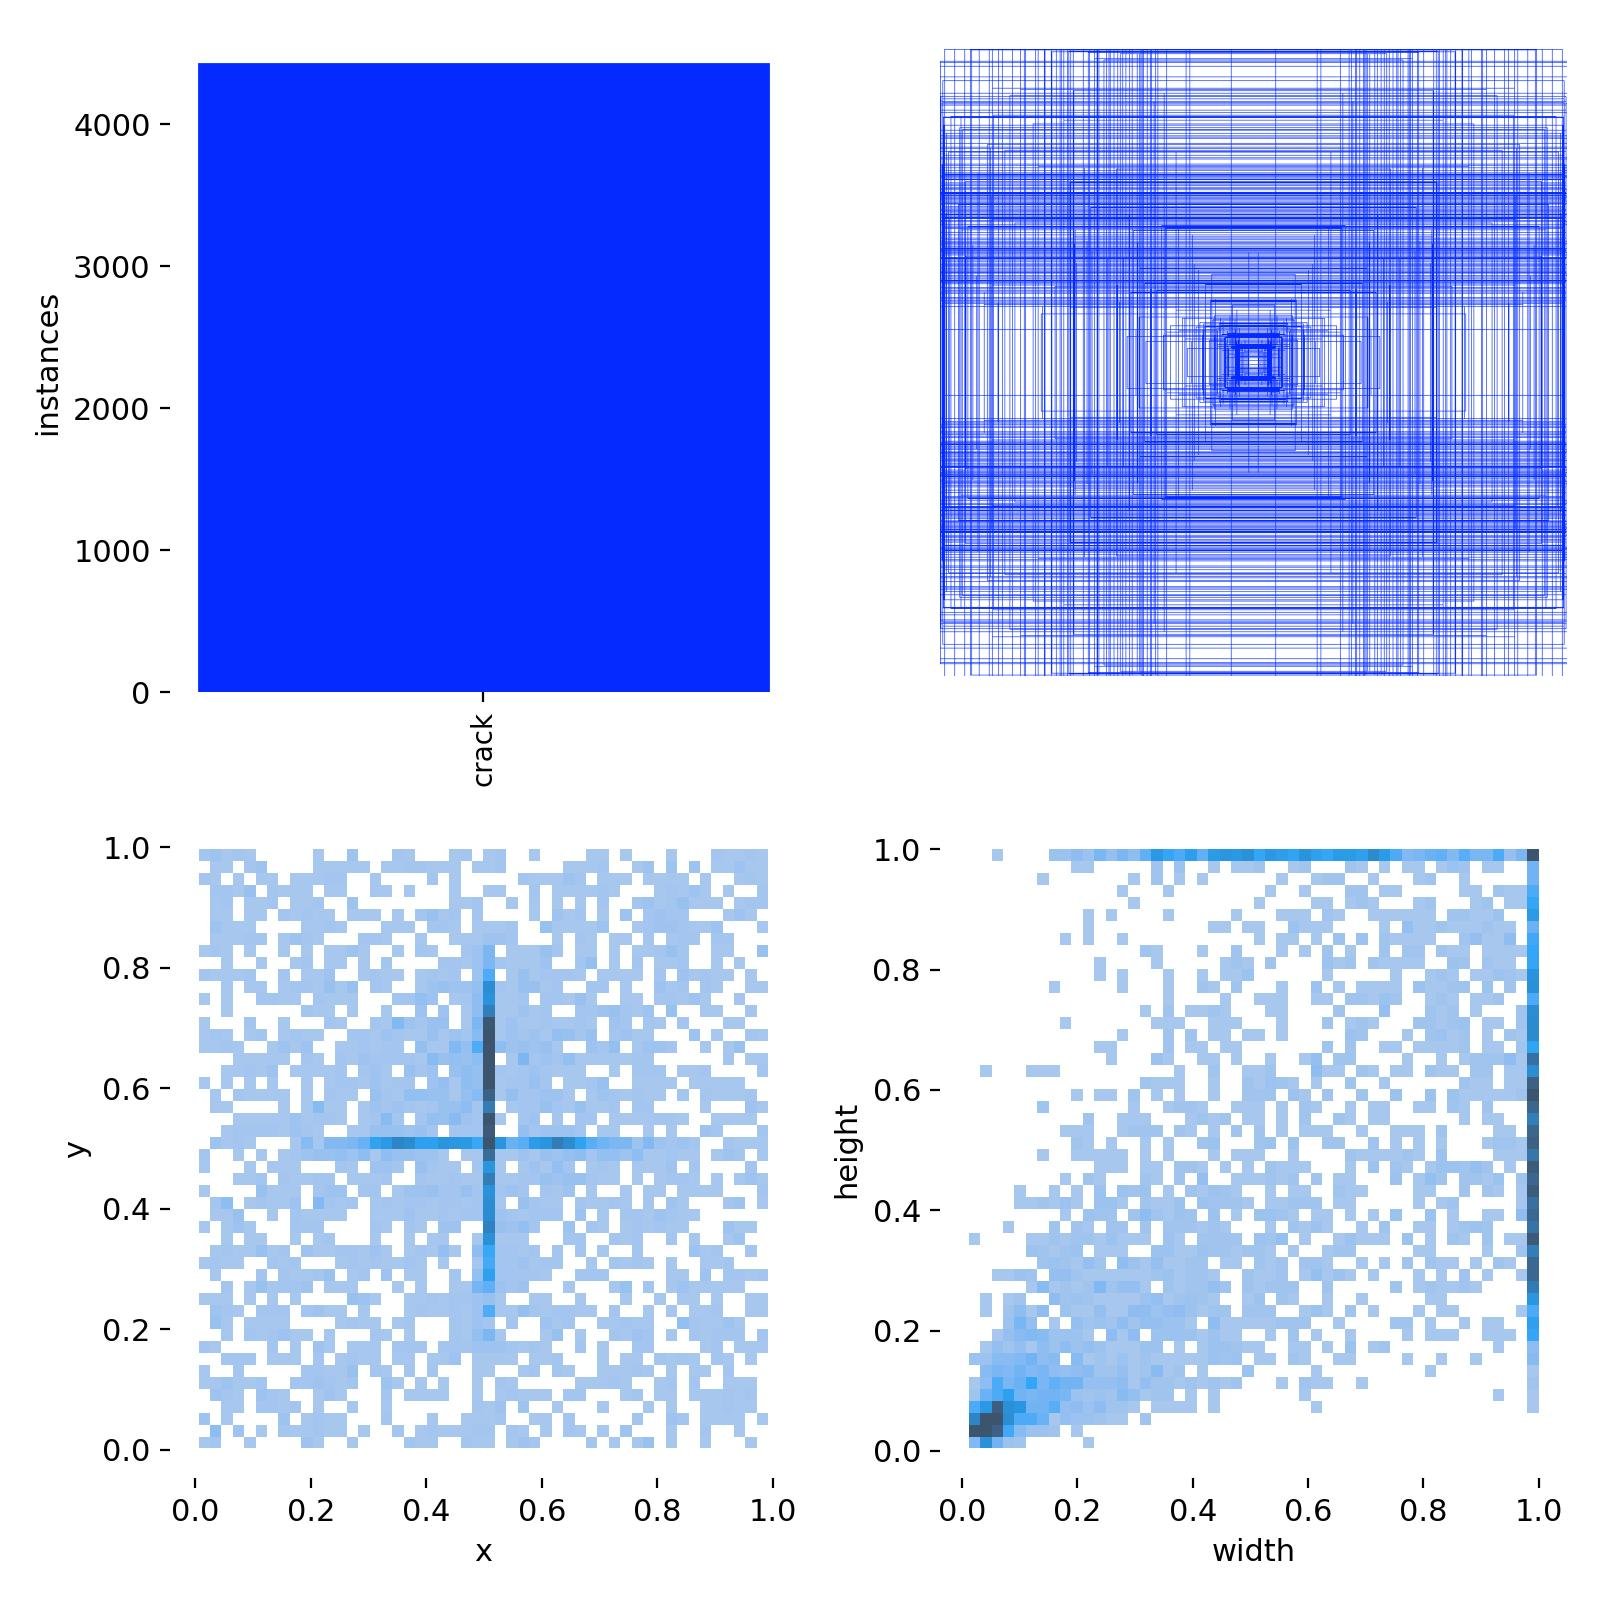

In [ ]:
Image("/content/runs/detect/train4/labels.jpg", width=600)

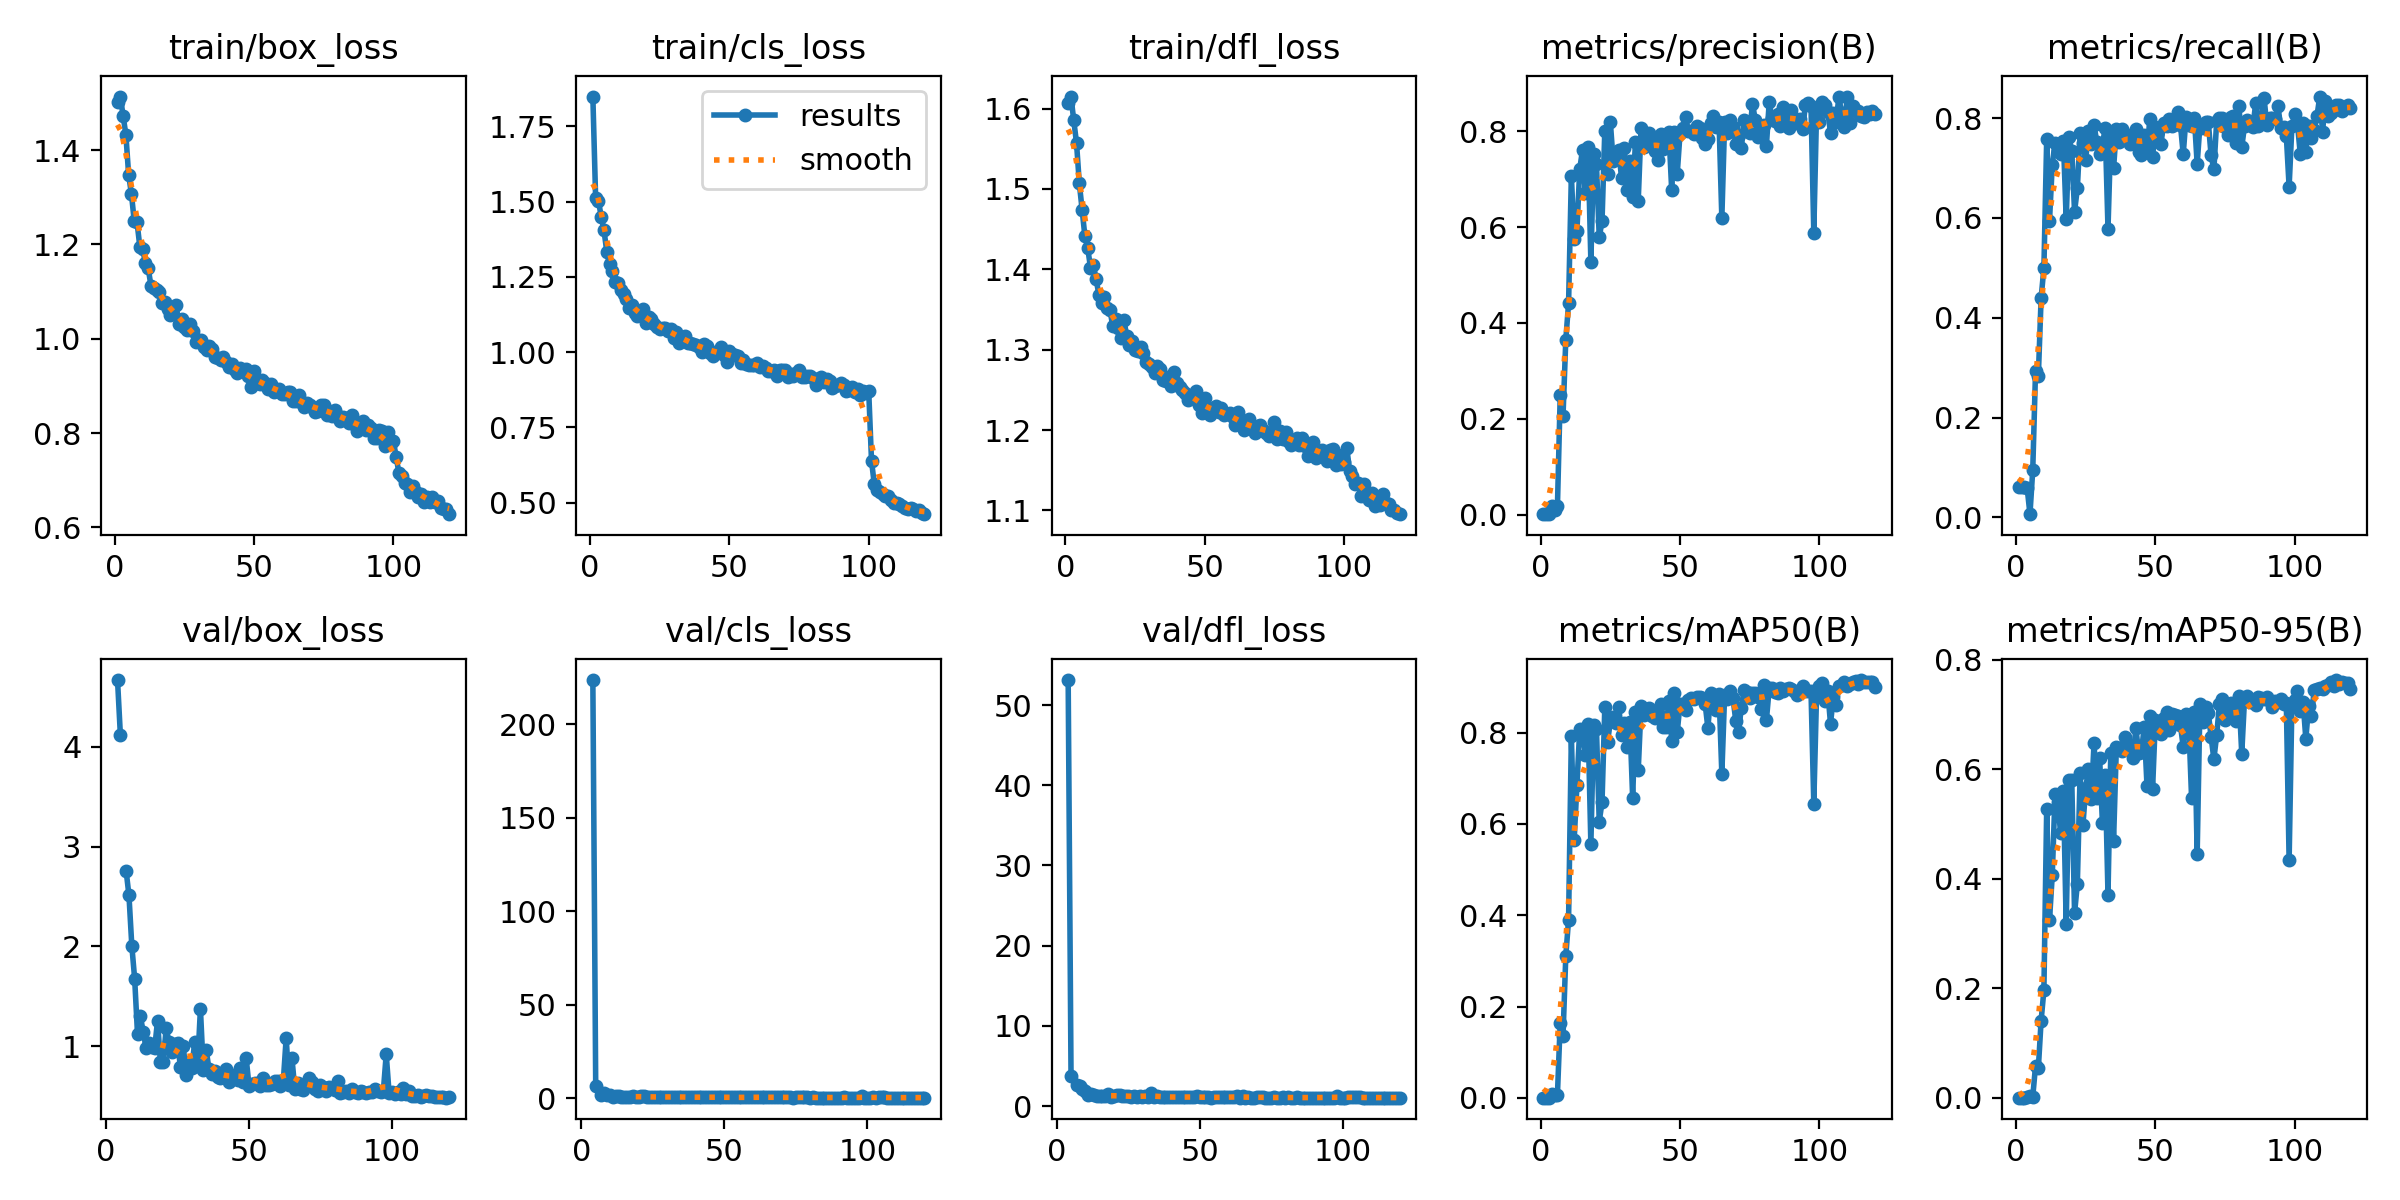

In [ ]:
Image("/content/runs/detect/train4/results.png", width=600)

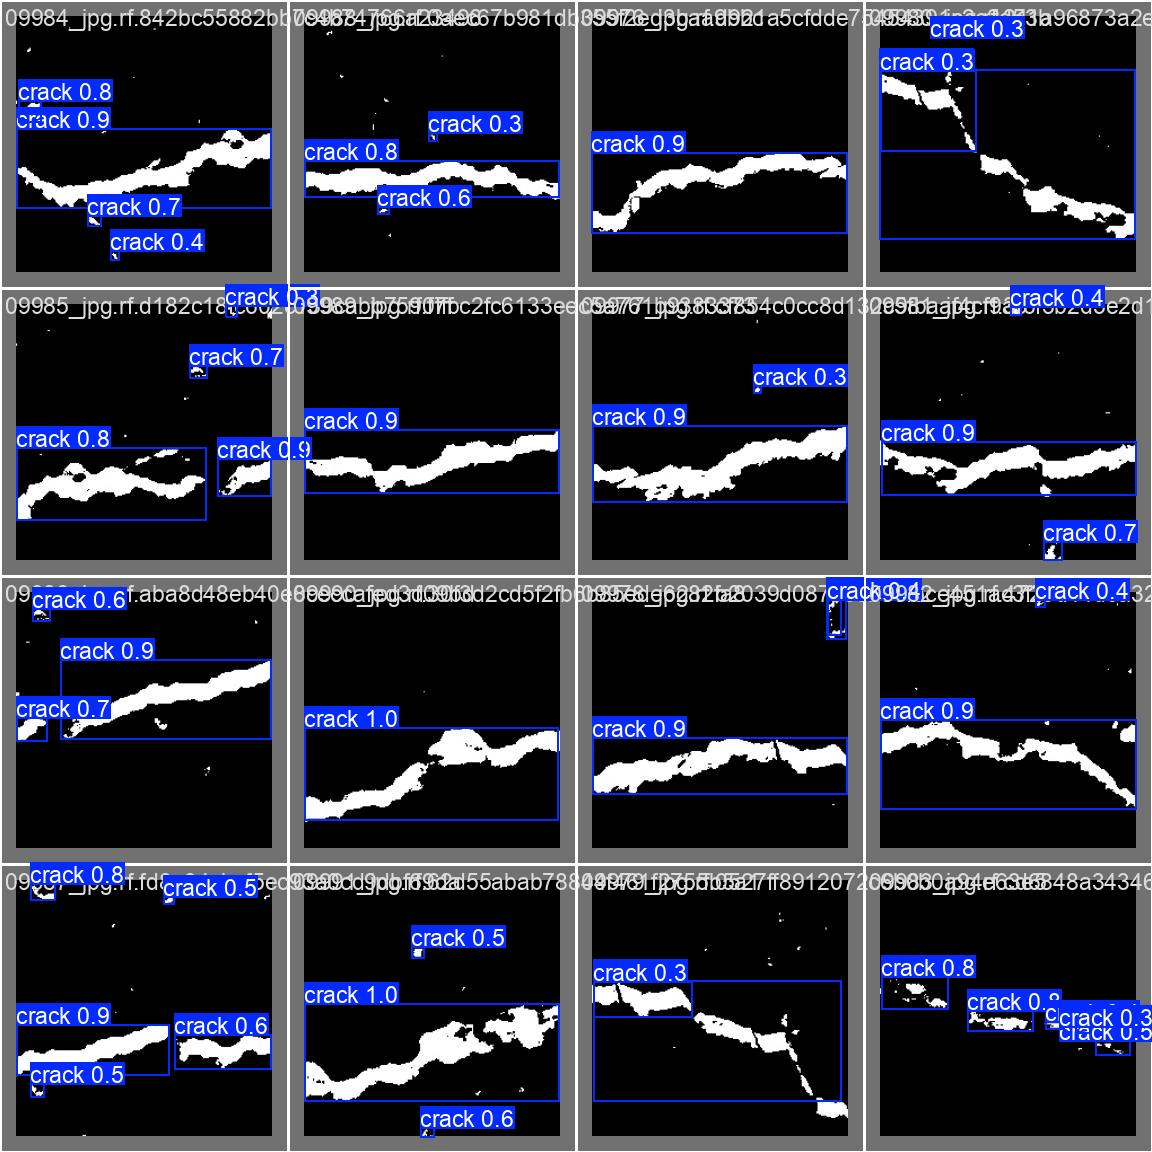

In [ ]:
Image("/content/runs/detect/train4/val_batch0_pred.jpg", width=600)

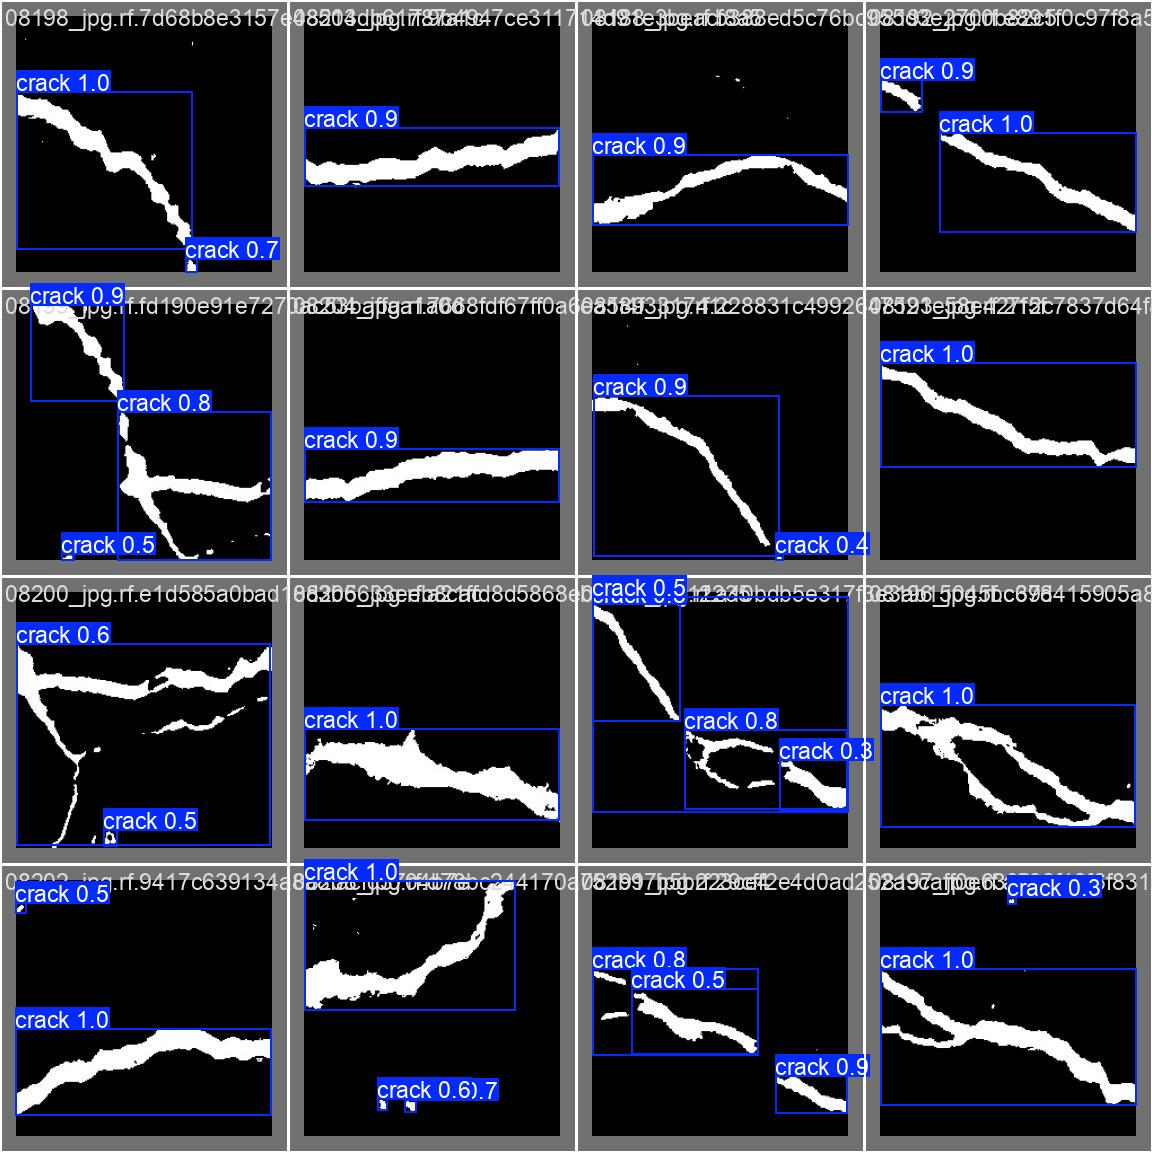

In [ ]:
Image("/content/runs/detect/train4/val_batch1_pred.jpg", width=600)

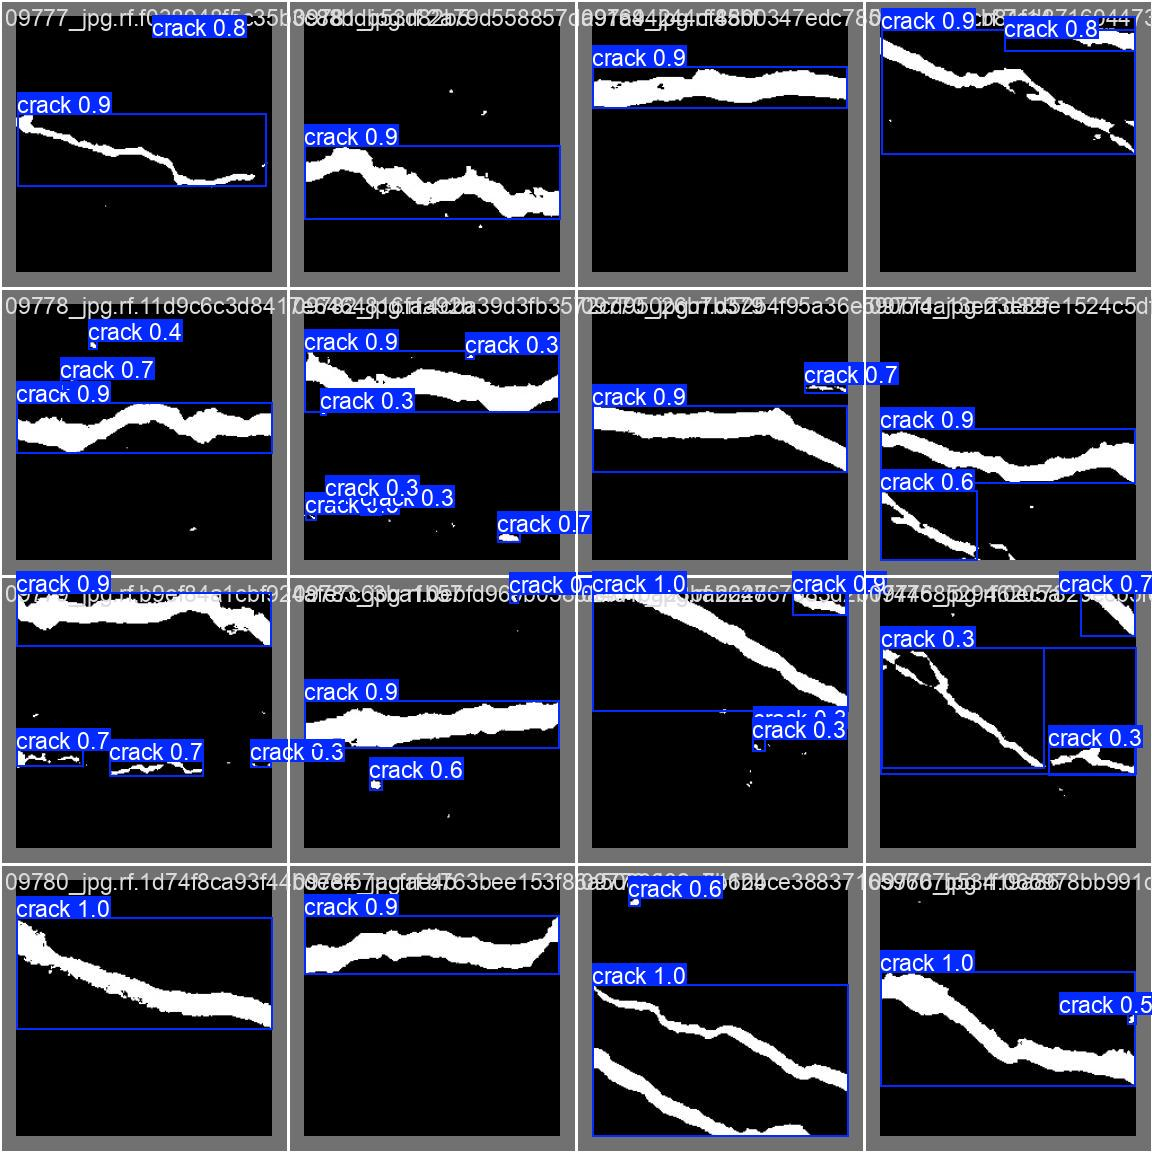

In [ ]:
Image("/content/runs/detect/train4/val_batch2_pred.jpg", width=600)

In [ ]:
!zip -r runs_detect_train4.zip /content/runs/detect/train4

  adding: content/runs/detect/train4/ (stored 0%)
  adding: content/runs/detect/train4/confusion_matrix_normalized.png (deflated 38%)
  adding: content/runs/detect/train4/train_batch4601.jpg (deflated 28%)
  adding: content/runs/detect/train4/val_batch1_labels.jpg (deflated 28%)
  adding: content/runs/detect/train4/train_batch2.jpg (deflated 26%)
  adding: content/runs/detect/train4/F1_curve.png (deflated 18%)
  adding: content/runs/detect/train4/val_batch1_pred.jpg (deflated 27%)
  adding: content/runs/detect/train4/events.out.tfevents.1729625081.5d13132bc443.42452.0 (deflated 91%)
  adding: content/runs/detect/train4/train_batch4602.jpg (deflated 29%)
  adding: content/runs/detect/train4/weights/ (stored 0%)
  adding: content/runs/detect/train4/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train4/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train4/val_batch2_pred.jpg (deflated 25%)
  adding: content/runs/detect/train4/train_batch4600.jpg (deflated 29%)
  

In [ ]:
!zip -r runs_detect_val.zip /content/runs/detect/val8

  adding: content/runs/detect/val8/ (stored 0%)
  adding: content/runs/detect/val8/confusion_matrix_normalized.png (deflated 38%)
  adding: content/runs/detect/val8/val_batch1_labels.jpg (deflated 29%)
  adding: content/runs/detect/val8/F1_curve.png (deflated 18%)
  adding: content/runs/detect/val8/val_batch1_pred.jpg (deflated 27%)
  adding: content/runs/detect/val8/val_batch2_pred.jpg (deflated 27%)
  adding: content/runs/detect/val8/confusion_matrix.png (deflated 38%)
  adding: content/runs/detect/val8/val_batch0_labels.jpg (deflated 26%)
  adding: content/runs/detect/val8/val_batch2_labels.jpg (deflated 28%)
  adding: content/runs/detect/val8/val_batch0_pred.jpg (deflated 24%)
  adding: content/runs/detect/val8/PR_curve.png (deflated 20%)
  adding: content/runs/detect/val8/P_curve.png (deflated 19%)
  adding: content/runs/detect/val8/R_curve.png (deflated 17%)


# Without albumentation for last 30 epochs (Total 150)




In [ ]:
!yolo task=detect mode=train model=yolo11l.pt data = "/content/Crack-Detection-(B&W)-1/data.yaml" epochs=150 imgsz=256 batch=64 close_mosaic=30 plots=True

100% 49.0M/49.0M [00:01<00:00, 42.9MB/s]
Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/Crack-Detection-(B&W)-1/data.yaml, epochs=150, time=None, patience=100, batch=64, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=30, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data="/content/Crack-Detection-(B&W)-1/data.yaml" imgsz=256 batch=64

Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Scanning /content/Crack-Detection-(B&W)-1/valid/labels.cache... 487 images, 0 backgrounds, 0 corrupt: 100% 487/487 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.44it/s]
                   all        487        924      0.842      0.825      0.916      0.766
Speed: 0.3ms preprocess, 5.8ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!zip -r runs_detect_train.zip /content/runs/detect/train

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 30%)
  adding: content/runs/detect/train/train_batch5522.jpg (deflated 28%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 41%)
  adding: content/runs/detect/train/train_batch5520.jpg (deflated 30%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 25%)
  adding: content/runs/detect/train/PR_curve.png (deflated 20%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 26%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 37%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 27%)
  adding: content/runs/detect/train/events.out.tfevents.1729792349.8d6bfd7b5fa3.2734.0 (deflated 91%)
  adding: content

In [ ]:
!zip -r runs_detect_val.zip /content/runs/detect/val

  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 26%)
  adding: content/runs/detect/val/PR_curve.png (deflated 20%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 38%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 27%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 27%)
  adding: content/runs/detect/val/R_curve.png (deflated 17%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 26%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 37%)
  adding: content/runs/detect/val/F1_curve.png (deflated 18%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 27%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 29%)
  adding: content/runs/detect/val/P_curve.png (deflated 19%)


# Without augmentation for last 30 epochs (Total 130)


In [ ]:
!yolo task=detect mode=train model=yolo11l.pt data = "/content/Crack-Detection-(B&W)-1/data.yaml" epochs=130 imgsz=256 batch=64 close_mosaic=30 plots=True

100% 49.0M/49.0M [00:00<00:00, 329MB/s]
Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/Crack-Detection-(B&W)-1/data.yaml, epochs=130, time=None, patience=100, batch=64, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=30, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data="/content/Crack-Detection-(B&W)-1/data.yaml" imgsz=256 batch=64

Ultralytics 8.3.22 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11l summary (fused): 464 layers, 25,280,083 parameters, 0 gradients, 86.6 GFLOPs
val: Scanning /content/Crack-Detection-(B&W)-1/valid/labels.cache... 487 images, 0 backgrounds, 0 corrupt: 100% 487/487 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:05<00:00,  1.40it/s]
                   all        487        924      0.803      0.841      0.909      0.762
Speed: 0.3ms preprocess, 6.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!zip -r runs_detect_train.zip /content/runs/detect/train

In [ ]:
!zip -r runs_detect_val.zip /content/runs/detect/val

  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 27%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 27%)
  adding: content/runs/detect/val/PR_curve.png (deflated 20%)
  adding: content/runs/detect/val/R_curve.png (deflated 17%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 25%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 27%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 37%)
  adding: content/runs/detect/val/F1_curve.png (deflated 18%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 29%)
  adding: content/runs/detect/val/P_curve.png (deflated 19%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 38%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 26%)
  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 27%)
  adding: content/